    Data Story on the IMDB Dataset

First we explore the dataset and clean it to make it usable for analysis

In [2]:
#import packages


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from IPython.core.display import HTML
from scipy.stats import stats
import seaborn as sns
sns.set(color_codes=True)
from datetime import datetime
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))
%matplotlib inline
%pylab inline


Populating the interactive namespace from numpy and matplotlib


/Users/ruhama.ahale/anaconda/lib/python3.6/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['datetime']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [3]:
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

Load the data

In [4]:
data = pd.read_csv("movie_metadata.csv")
data.head(5)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [5]:
#Keep relevent columns from the table
data = data[['movie_imdb_link', 'imdb_score', 'movie_title', 'title_year', 'duration', 'language', 'country', 'genres', 'director_name', 'director_facebook_likes', 'movie_facebook_likes', 'actor_1_name', 'actor_2_name', 'actor_3_name', 'actor_1_facebook_likes', 'actor_2_facebook_likes', 'actor_3_facebook_likes', 'cast_total_facebook_likes', 'num_critic_for_reviews', 'num_voted_users', 'num_user_for_reviews', 'aspect_ratio', 'facenumber_in_poster', 'plot_keywords','content_rating']]


In [6]:
len(data)

5043

In [7]:
#check info
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 25 columns):
movie_imdb_link              5043 non-null object
imdb_score                   5043 non-null float64
movie_title                  5043 non-null object
title_year                   4935 non-null float64
duration                     5028 non-null float64
language                     5031 non-null object
country                      5038 non-null object
genres                       5043 non-null object
director_name                4939 non-null object
director_facebook_likes      4939 non-null float64
movie_facebook_likes         5043 non-null int64
actor_1_name                 5036 non-null object
actor_2_name                 5030 non-null object
actor_3_name                 5020 non-null object
actor_1_facebook_likes       5036 non-null float64
actor_2_facebook_likes       5030 non-null float64
actor_3_facebook_likes       5020 non-null float64
cast_total_facebook_likes    5043 non

Check for missing values

In [8]:
data.isnull().values.any()

True

In [9]:
#Check how many values are null in each column
data[data.columns[:]].isnull().sum()

movie_imdb_link                0
imdb_score                     0
movie_title                    0
title_year                   108
duration                      15
language                      12
country                        5
genres                         0
director_name                104
director_facebook_likes      104
movie_facebook_likes           0
actor_1_name                   7
actor_2_name                  13
actor_3_name                  23
actor_1_facebook_likes         7
actor_2_facebook_likes        13
actor_3_facebook_likes        23
cast_total_facebook_likes      0
num_critic_for_reviews        50
num_voted_users                0
num_user_for_reviews          21
aspect_ratio                 329
facenumber_in_poster          13
plot_keywords                153
content_rating               303
dtype: int64

In [10]:
prop_missing = round((data[data.columns[:]].isnull().sum()/data[data.columns[:]].count())*100,2)
prop_missing

movie_imdb_link              0.00
imdb_score                   0.00
movie_title                  0.00
title_year                   2.19
duration                     0.30
language                     0.24
country                      0.10
genres                       0.00
director_name                2.11
director_facebook_likes      2.11
movie_facebook_likes         0.00
actor_1_name                 0.14
actor_2_name                 0.26
actor_3_name                 0.46
actor_1_facebook_likes       0.14
actor_2_facebook_likes       0.26
actor_3_facebook_likes       0.46
cast_total_facebook_likes    0.00
num_critic_for_reviews       1.00
num_voted_users              0.00
num_user_for_reviews         0.42
aspect_ratio                 6.98
facenumber_in_poster         0.26
plot_keywords                3.13
content_rating               6.39
dtype: float64

In [11]:
#Remove the missing data with title year missing
clean_data = data[data.title_year.notnull() & data.duration.notnull()]
len(clean_data)

4923

In [12]:
clean_data.loc[:, 'title_year'] = clean_data['title_year'].astype(int).astype(str)
clean_data.loc[:, 'year'] = pd.to_datetime(clean_data['title_year'], format='%Y')

/Users/ruhama.ahale/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/Users/ruhama.ahale/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:297: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)


In [13]:
clean_data.describe()

,imdb_score,duration,director_facebook_likes,movie_facebook_likes,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,cast_total_facebook_likes,num_critic_for_reviews,num_voted_users,num_user_for_reviews,aspect_ratio,facenumber_in_poster
count,4923.000000,4923.000000,4923.000000,4923.000000,4916.000000,4913.000000,4906.000000,4923.000000,4885.000000,4.923000e+03,4910.000000,4627.000000,4910.000000
mean,6.418769,108.167378,688.581353,7612.714199,6680.215216,1679.045186,652.106400,9858.146049,142.809212,8.507018e+04,277.104481,2.128965,1.359878
std,1.112902,22.541217,2817.656735,19474.099601,15169.990429,4085.578189,1683.131836,18339.570916,121.592375,1.397094e+05,380.852747,0.789255,2.001990
min,1.600000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,5.000000e+00,1.000000,1.180000,0.000000
25%,5.800000,94.000000,7.000000,0.000000,621.750000,282.000000,133.250000,1431.000000,53.000000,9.058500e+03,68.000000,1.850000,0.000000
50%,6.500000,104.000000,49.000000,166.000000,995.500000,599.000000,372.000000,3132.000000,112.000000,3.513700e+04,160.000000,2.350000,1.000000
75%,7.200000,118.000000,197.000000,3000.000000,11000.000000,922.000000,637.000000,14032.000000,197.000000,9.827350e+04,332.000000,2.350000,2.000000
max,9.300000,330.000000,23000.000000,349000.000000,640000.000000,137000.000000,23000.000000,656730.000000,813.000000,1.689764e+06,5060.000000,16.000000,43.000000


Q1. What are the total number of movies reviewed by decade?

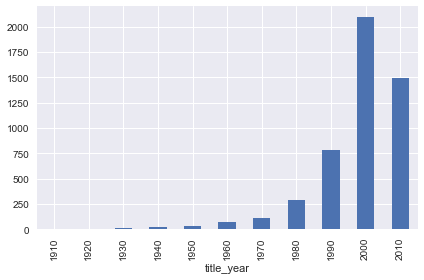

In [14]:
temp = clean_data[['year', 'title_year','movie_title', 'imdb_score']]
#solutio
temp1 = temp[['title_year', 'movie_title']]
temp1.groupby(temp1.title_year.astype(int) // 10 * 10).size().plot(kind='bar')
plt.tight_layout()
#need help on adding labels to below

This shows a growing trend of movies created every decade. The amount of movies created is growing exponentially. The last decade data is only available for 4 years (2010-2014) so it obviously shows a drop in movies created in the last decade

Q2. What has been the trend of imdb rating?

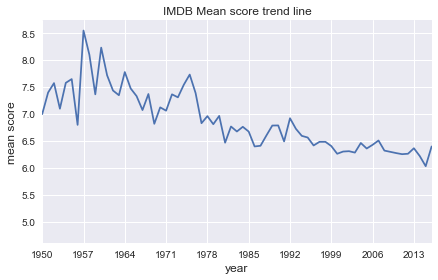

In [15]:
#years = mdates.YearLocator()
temp2 = clean_data[['title_year', 'imdb_score']]
temp2 = temp2.groupby(temp2.title_year.astype(int)).imdb_score.mean().plot(kind ='line', title ='IMDB Mean score trend line', xlim=((1950, 2016)))
temp2.xaxis.set_ticks(np.arange(1950, 2016, 7))
plt.tight_layout()
#fig.suptitle('test title', fontsize=20)
plt.xlabel('year', fontsize=12)
plt.ylabel('mean score', fontsize=12)
#add plot title

It looks like the average score of movies is decreasing over time, However, this could be due to an increase in no of movies being created over time

Below plot shows comparison of movies created vs average imdb score over time

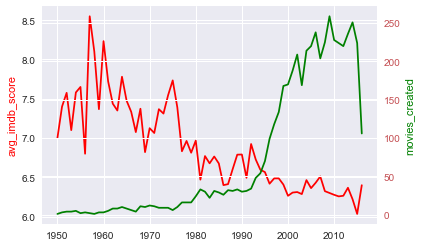

In [16]:
#create new table with grouped information
temp = clean_data[['title_year', 'imdb_score', 'movie_imdb_link']]
temp = temp[temp.title_year.astype(int)>1949]
res = temp.groupby(temp.title_year.astype(int)).agg({'imdb_score': 'mean', 'movie_imdb_link': 'count'}).reset_index()
res.columns = ['title_year', 'avg_imdb_score', 'movies_created']
rows = res.title_year

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(res.title_year, res.avg_imdb_score, color = 'red')
ax1.set_ylabel('avg_imdb_score', color = 'red')

ax2 = ax1.twinx()
ax2.plot(res.title_year, res.movies_created, color='green')
ax2.set_ylabel('movies_created', color='green')
for tl in ax2.get_yticklabels():
    tl.set_color('r')
plt.show()

#plt.savefig('images/two-scales-5.png')

As we can see, the decrease in average movie scores can be attributed to the increase in amount of movies created in recent times, the increase in amount of movies will lead to more outliers affecting the mean for the duration.

Q3. How do the score change for each type of content rating? (Are the content ratings tied to the imdb scores?)


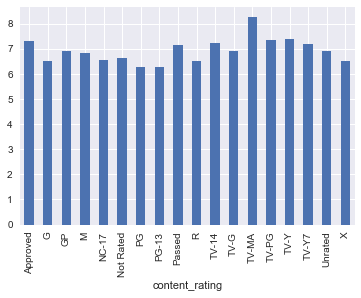

In [17]:
temp = data[['content_rating', 'imdb_score']]
temp.groupby(temp.content_rating).imdb_score.mean().plot(kind='bar')
plt.show()

Overall, TV-MA content has highest score but there isnt much difference in score between content

Q4. Which director has the highest IMDB average score? Display the top 10


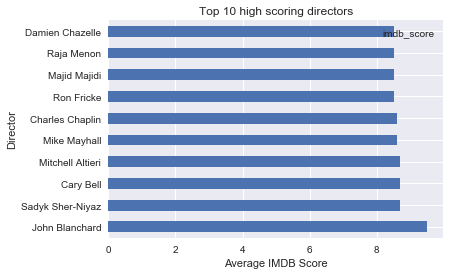

In [18]:
#len(data['director_name'])
temp = data[['director_name', 'imdb_score']]
t1 = temp.groupby(temp.director_name).mean().sort_values(by='imdb_score', ascending=[False])
t1 = t1.head(10).plot(kind='barh', title='Top 10 high scoring directors', legend=[True])
# set labels for both axes
t1 = t1.set( xlabel='Average IMDB Score', ylabel='Director')
plt.show()

Q5. Plot the relation between the variables movie facebook likes and imdb_score using a scatterplot


In [40]:
#scatterplot average_imdb_score vs movie_facebook_likes

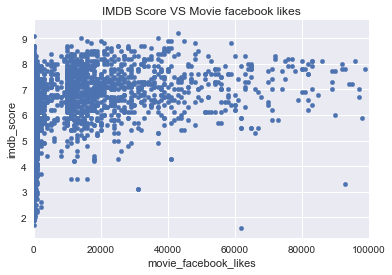

In [41]:
#plot
temp = clean_data[['movie_facebook_likes', 'imdb_score']]
temp = temp[temp.imdb_score > 0]
x = temp.plot(x='movie_facebook_likes', y = 'imdb_score',kind='scatter', xlim = (0, 100000), title='IMDB Score VS Movie facebook likes', legend=[True])


In [42]:
print( temp[['imdb_score','movie_facebook_likes']].corr())

                      imdb_score  movie_facebook_likes
imdb_score               1.00000               0.25389
movie_facebook_likes     0.25389               1.00000


These is weak positive correlation between imdb score and movie facebook likes

Q6. Plot average imdb score vs durartion of movie

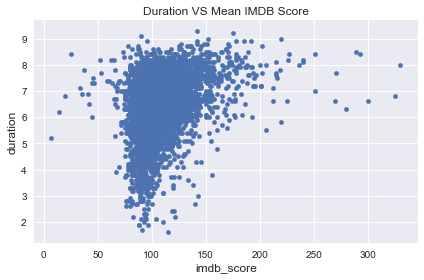

In [32]:
temp = clean_data[['duration', 'imdb_score']]
temp = temp.plot('duration', 'imdb_score', kind ='scatter', title ='Duration VS Mean IMDB Score')
plt.xlabel('imdb_score', fontsize=12)
plt.ylabel('duration', fontsize=12)
plt.tight_layout()

#add plot title

In [33]:
# np.correlate(clean_data["imdb_score"], clean_data["duration"])
print( clean_data[['imdb_score','duration']].corr())

            imdb_score  duration
imdb_score    1.000000  0.341539
duration      0.341539  1.000000


There is weak positive correlation between imdb_score and duration of movie

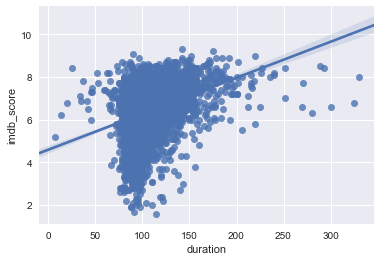

In [34]:
temp = clean_data[['duration', 'imdb_score']]
sns.regplot(x="duration", y="imdb_score", data=temp);

This shows that there is weak positive correlation between imdb_score and duration, we can use this to find an optimum range of duration that gives the best scores.

Q7. Check if movies with language 'hindi' have more duration on average than with language 'english'

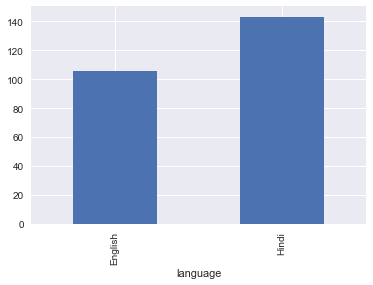

In [43]:
temp = clean_data[['language', 'duration', 'title_year']]
temp1 = temp[temp.title_year.astype(int) >= 2000]
temp1 = temp1.loc[temp1['language'].isin(['English','Hindi'])]
# temp1 = temp1[temp1.language == 'English' | temp1.language == 'Hindi']
temp1.groupby(temp1.language).duration.mean().plot(kind='bar')
plt.show()

In [36]:
hindi = temp1[temp1.language == 'Hindi']
english = temp1[temp1.language == 'English'] 

In [37]:
print("The dataset has {} Hindi and {} English movies".format(len(hindi), len(english)) )

The dataset has 26 Hindi and 3308 English movies


As we can see from the above plot, Hindi movies are longer than English movies, however the Hindi movie dataset only has 26 movies while the English movie dataset has 3308 movies (all realeased since year 2000). We need more data for Hindi movies in order to draw a comparison. Below we plot the histogram for these two datasets:

The mean duration of the Hindi movies is 143.27 and standard deviation is 25.14


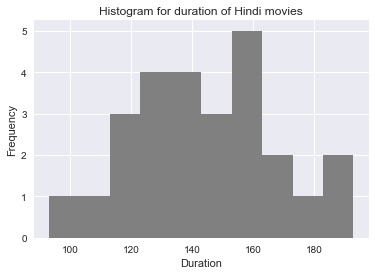

In [38]:
#plot histogram for hindi movie durations
hindi.duration.plot(kind='hist',color='0.5', bins = 10, title = 'Histogram for duration of Hindi movies').set_xlabel('Duration')
hindi_mean = round(mean(hindi["duration"]),2)
hindi_sd = round((hindi["duration"]).std(),2)
print("The mean duration of the Hindi movies is {} and standard deviation is {}".format(hindi_mean, hindi_sd) )


The mean duration of the English movies is 105.75 and standard duration is 19.23


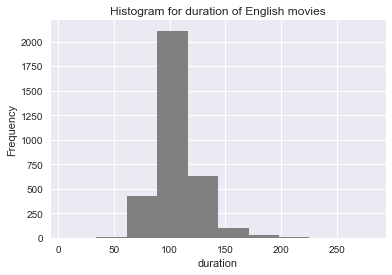

In [39]:
#plot histogram for english movie durations
english.duration.plot(kind='hist',color='0.5', bins = 10, title = 'Histogram for duration of English movies').set_xlabel('duration')
english_mean = round(mean(english["duration"]),2)
english_sd = round((english["duration"]).std(),2)
print("The mean duration of the English movies is {} and standard duration is {}".format(english_mean, english_sd) )


Based on these plots we can analyze the hypothesis that mean duration of Hindi movies and English movies are same, we can use the t test to test
$H_0: \mu_h=\mu_e $ VS $H_0: \mu_h != \mu_e$ at alpha = 0.05

Q. Having made these plots, what are some insights you get from them? Do you see any correlations? Is there a hypothesis you would like to investigate further? What other questions do they lead you to ask?

A. 1) We see that the amount of movies created over time is increasing exponentially while the average IMDB score for the movies is decreasing over time
2) We see a positive correlation between IMDB Score and Movie facebook likes and between Duration of movie and its IMDB Score
3) We see a difference in mean duration of movies created since 2000 between groups of Hindi and English movies, this leads of us formulate a Hypothesis test to test if the durations are similar between the groups or not
